In [5]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import PowerTransformer, StandardScaler
from typing import Tuple, Optional, Literal, List, Union
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

### EDA

In [2]:
df = pd.read_csv("/Users/thobelasixpence/Documents/ml_zoomcamp_project/ml-mid-term-project/data/raw_data/SeoulBikeData.csv", encoding='ISO-8859-1')

In [3]:
df.head(1)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes


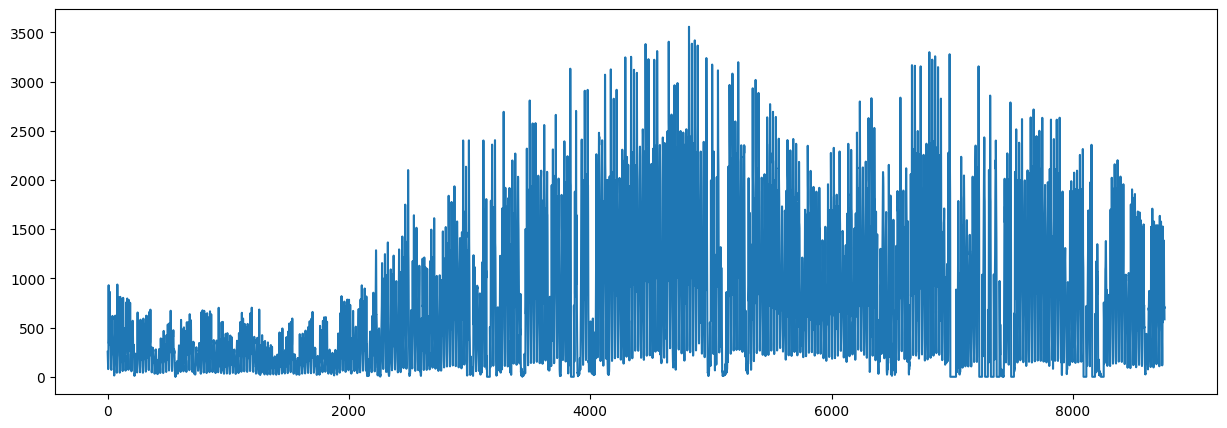

In [4]:
# which hour is likely to have  most rented bikes in a  day.
df['Rented Bike Count'].plot(figsize=(15,5))
plt.show()

<Axes: xlabel='Date'>

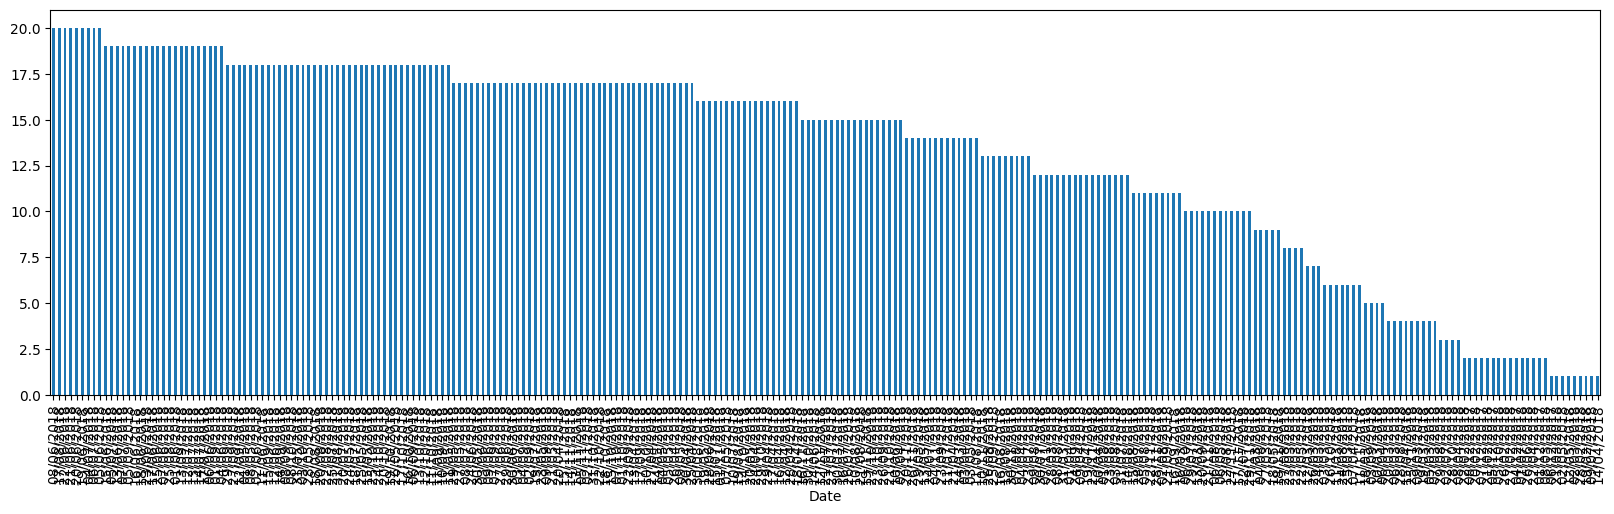

In [5]:
# which days have the highest number of bikes rented
highest_rental = df[df['Rented Bike Count'] > df['Rented Bike Count'].mean()]
highest_rental['Date'].value_counts().plot(kind='bar', figsize=(20,5))

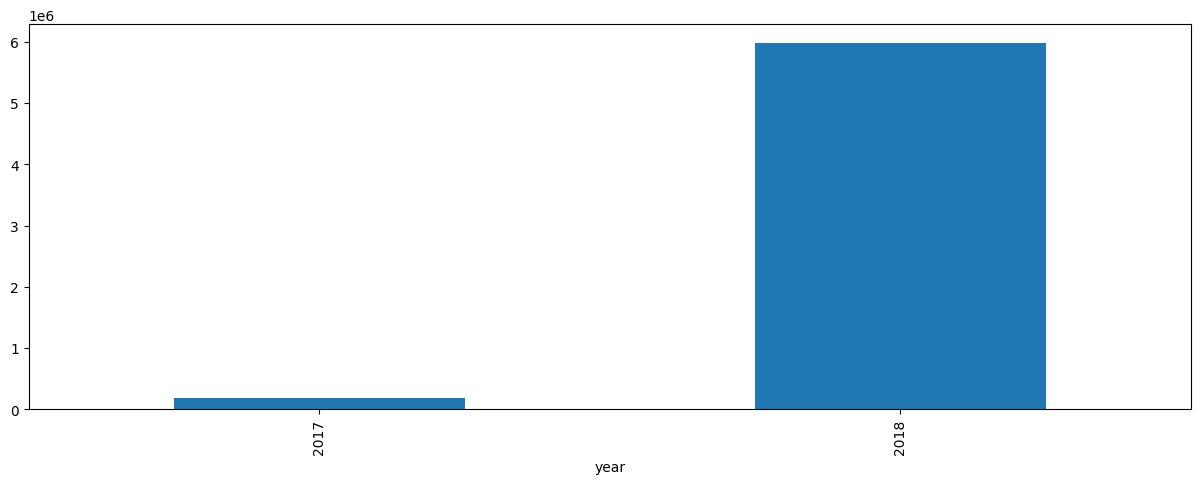

In [6]:
# which year had the highest number of rentals and which year had the lowest number of rentals
df['year'] = pd.DatetimeIndex(df['Date']).year
yearly_rental = df.groupby('year')['Rented Bike Count'].sum()
yearly_rental.plot(kind='bar', figsize=(15,5))
plt.show()

<Axes: xlabel='month'>

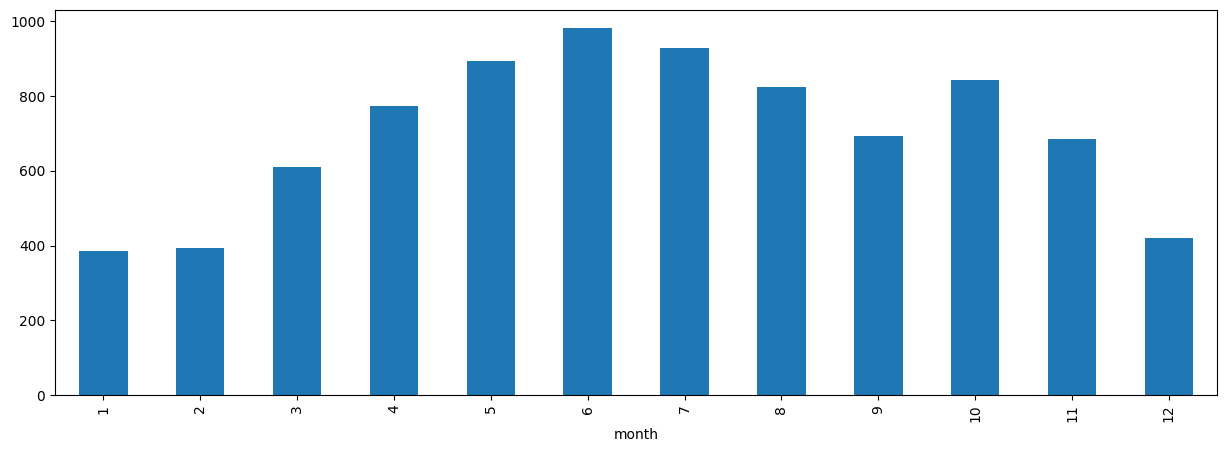

In [7]:
# which months had the highest rentals and which had the lowest rentals
df['month'] = pd.DatetimeIndex(df['Date']).month
monthly_rental = df.groupby('month')['Rented Bike Count'].mean()
monthly_rental.plot(kind='bar', figsize=(15,5))

<Axes: xlabel='day'>

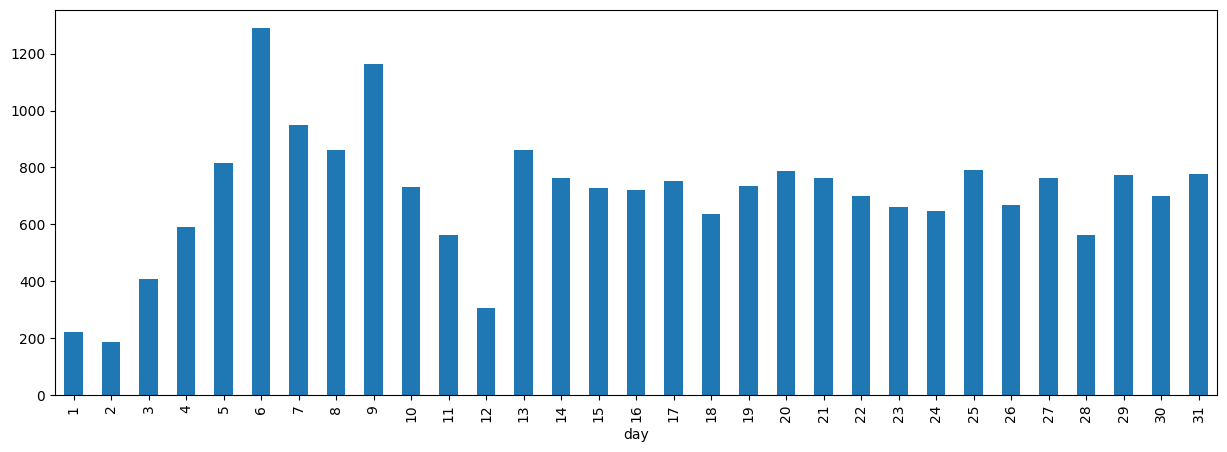

In [8]:
# day of the month where the bike rentals were high and low
df['day'] = pd.DatetimeIndex(df['Date']).day
daily_rentals = df.groupby('day')['Rented Bike Count'].mean()
daily_rentals.plot(kind='bar', figsize=(15,5))

<Axes: xlabel='day_name'>

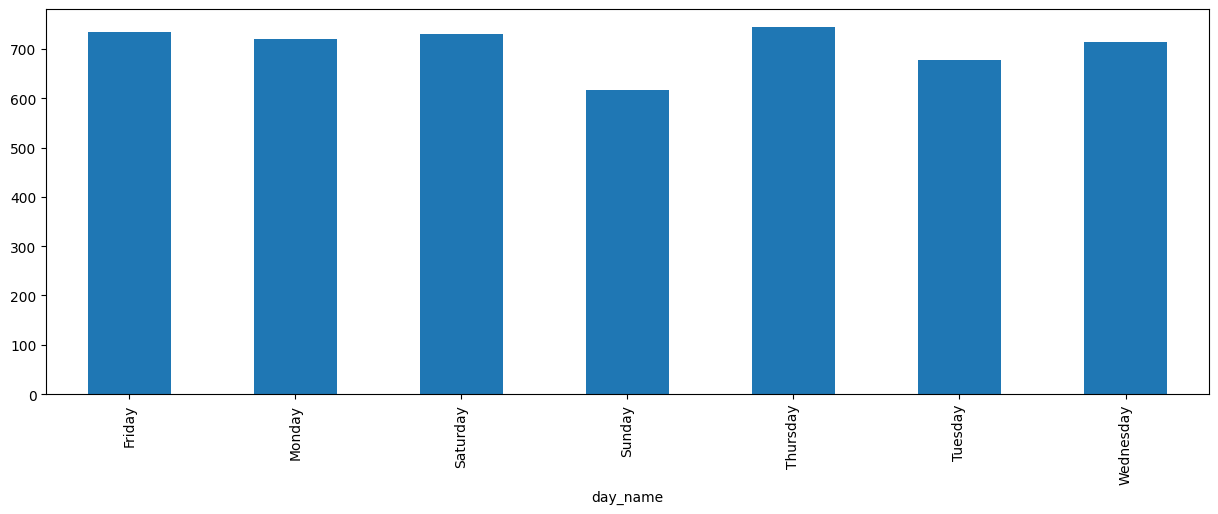

In [9]:
# now lets look the highest and lowest rentals in a week
df['day_name'] = pd.DatetimeIndex(df['Date']).day_name()
daily_weekly_rentals = df.groupby('day_name')['Rented Bike Count'].mean()
daily_weekly_rentals.plot(kind='bar', figsize=(15,5))

In [10]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year,month,day,day_name
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday


<Axes: xlabel='Seasons'>

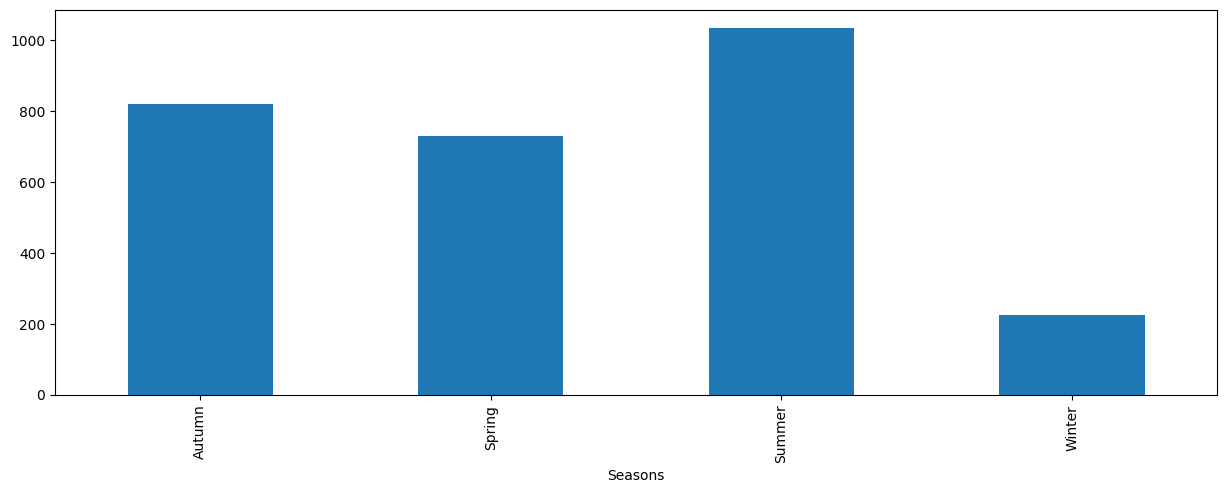

In [11]:
# which season had the highest and lowest bike rental count
season_rentals = df.groupby('Seasons')['Rented Bike Count'].mean()
season_rentals.plot(kind='bar', figsize=(15,5))

<Axes: xlabel='day_name'>

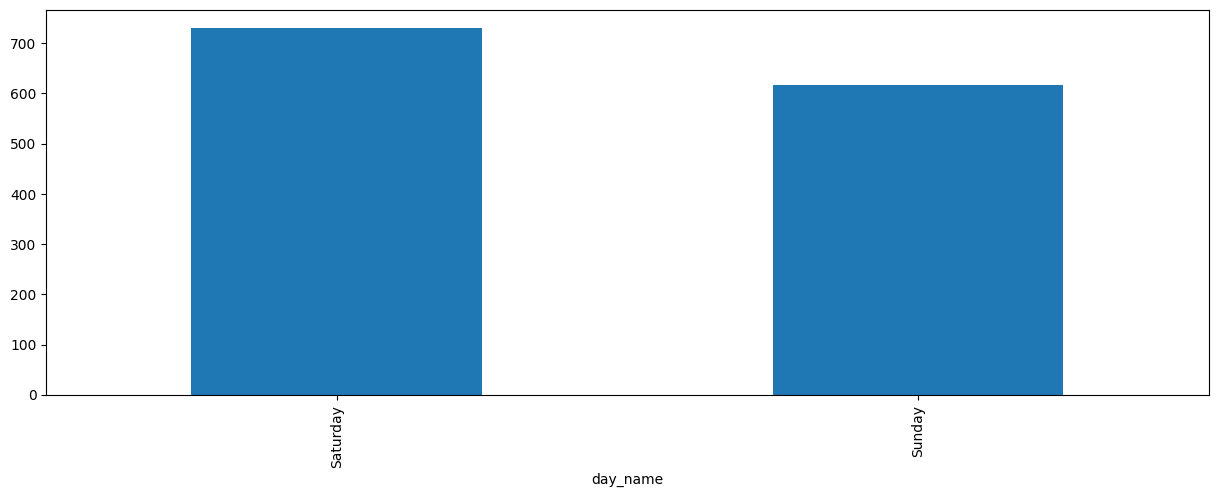

In [12]:
# bike rental count during the weekend
df['is_business_day'] = df['day_name'].apply(lambda x:1 if x not in ['Saturday','Sunday'] else 0)
weekend_rentals = df[df['is_business_day'] == 0].groupby('day_name')['Rented Bike Count'].mean()
weekend_rentals.plot(kind='bar', figsize=(15,5))

<Axes: xlabel='day_name'>

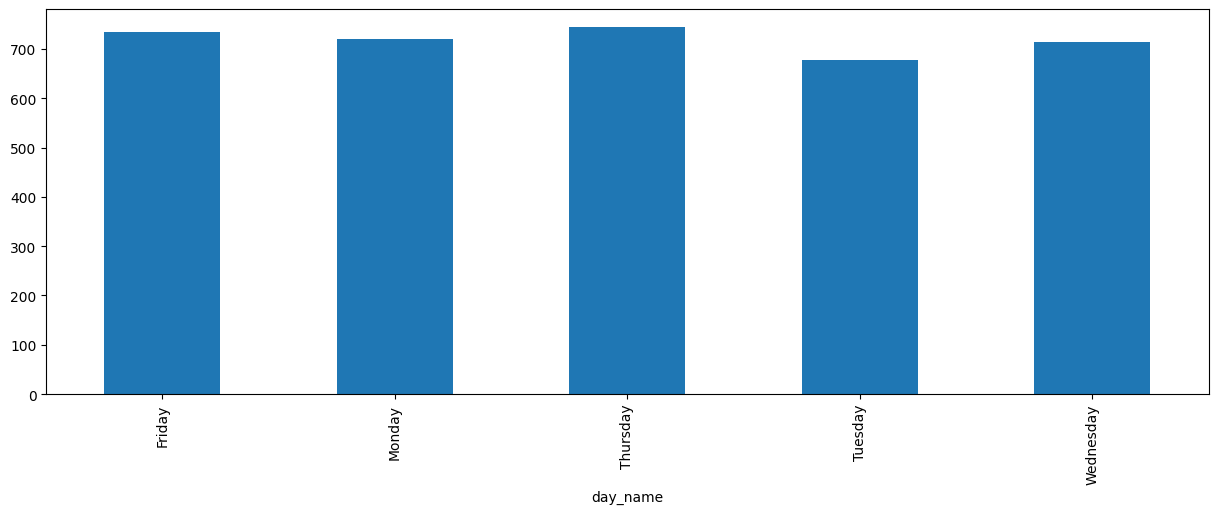

In [13]:
# bike rental count during the the week
df['is_business_day'] = df['day_name'].apply(lambda x:1 if x not in ['Saturday','Sunday'] else 0)
weekday_rentals = df[df['is_business_day'] == 1].groupby('day_name')['Rented Bike Count'].mean()
weekday_rentals.plot(kind='bar', figsize=(15,5))

<Axes: xlabel='Temperature(°C)', ylabel='Rented Bike Count'>

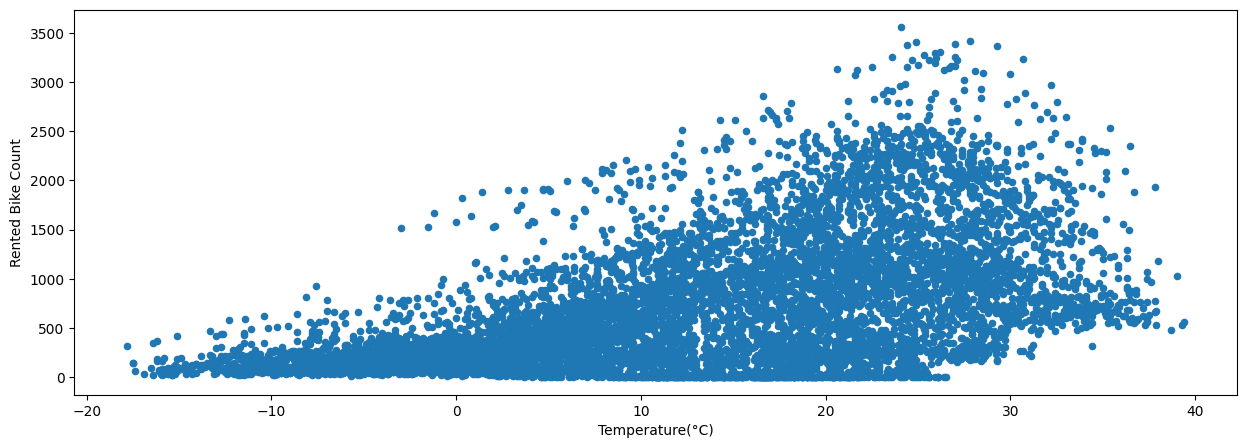

In [14]:
#  what is the correlation between tenmperature and bike rental
df.plot(kind='scatter', x='Temperature(°C)', y='Rented Bike Count', figsize=(15,5))

In [15]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'year', 'month', 'day', 'day_name',
       'is_business_day'],
      dtype='object')

<Axes: xlabel='Rainfall(mm)', ylabel='Rented Bike Count'>

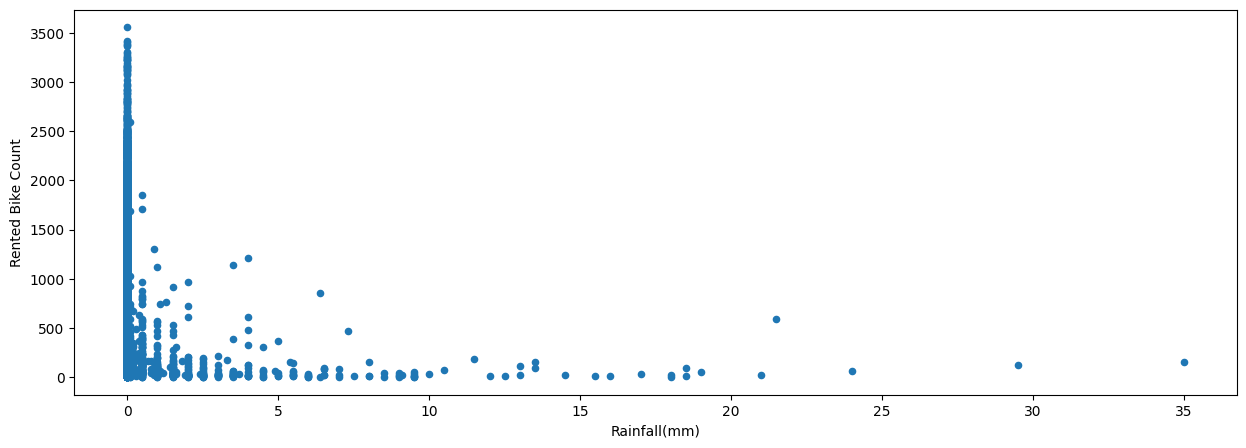

In [16]:
# correlation between rain and bike rental
df.plot(kind='scatter', x='Rainfall(mm)', y='Rented Bike Count', figsize=(15,5))

### Data Preprocessing


In [17]:
# PREPROCESS DATA
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year,month,day,day_name,is_business_day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday,1
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday,1
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday,1


In [18]:
df['Holiday'] = df['Holiday'].astype('category')
df['Functioning Day'] = df['Functioning Day'].astype('category')
df['Seasons'] = df['Seasons'].astype('category')
df['day_name'] = df['day_name'].astype('category')

In [19]:
for column in df.columns:
    if pd.api.types.is_object_dtype(df[column]):
        df[column] = df[column].astype(str)
    elif pd.api.types.is_numeric_dtype(df[column]):
        df[column] = pd.to_numeric(df[column], errors='coerce')
    elif pd.api.types.is_datetime64_dtype(df[column]):
        df[column] = pd.to_datetime(df[column])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Date                       8760 non-null   object  
 1   Rented Bike Count          8760 non-null   int64   
 2   Hour                       8760 non-null   int64   
 3   Temperature(°C)            8760 non-null   float64 
 4   Humidity(%)                8760 non-null   int64   
 5   Wind speed (m/s)           8760 non-null   float64 
 6   Visibility (10m)           8760 non-null   int64   
 7   Dew point temperature(°C)  8760 non-null   float64 
 8   Solar Radiation (MJ/m2)    8760 non-null   float64 
 9   Rainfall(mm)               8760 non-null   float64 
 10  Snowfall (cm)              8760 non-null   float64 
 11  Seasons                    8760 non-null   category
 12  Holiday                    8760 non-null   category
 13  Functioning Day            8760 n

In [21]:
duplicated = df[df.duplicated(keep=False)]
if duplicated.shape[0] > 0:
    df = df.drop_duplicates(inplace= True)

In [22]:
features_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]
for feature in features_with_na:
    if df[feature].dtype == 'categorical':
        df[feature].fillna(df[feature].mode()[0], inplace=True)
    else:
        df[feature].fillna(df[feature].mean())

In [23]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year,month,day,day_name,is_business_day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday,1
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday,1
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday,1


In [24]:
numerical_cols = df.select_dtypes(include=['number']).columns.to_list()
numerical_cols.remove('Rented Bike Count')
numerical_cols

['Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'year',
 'month',
 'day',
 'is_business_day']

In [25]:
for column in numerical_cols:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        outlier = df[(df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR)]
        print(f"{outlier.shape} : {column}")

(0, 19) : Hour
(0, 19) : Temperature(°C)
(0, 19) : Humidity(%)
(161, 19) : Wind speed (m/s)
(0, 19) : Visibility (10m)
(0, 19) : Dew point temperature(°C)
(641, 19) : Solar Radiation (MJ/m2)
(528, 19) : Rainfall(mm)
(443, 19) : Snowfall (cm)
(744, 19) : year
(0, 19) : month
(0, 19) : day
(0, 19) : is_business_day


In [26]:
df.shape

(8760, 19)

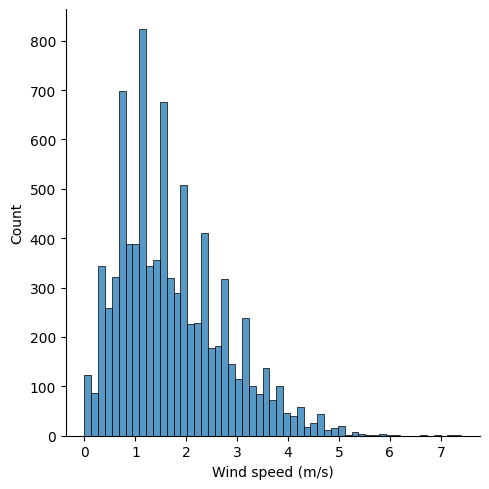

In [27]:
sns.displot(df['Wind speed (m/s)'])

<Axes: ylabel='Wind speed (m/s)'>

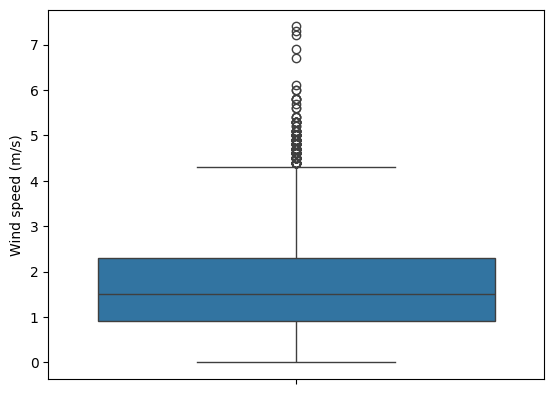

In [28]:
sns.boxplot(df['Wind speed (m/s)'])

/Users/thobelasixpence/Documents/ml_zoomcamp_project/ml-mid-term-project/mid-term-proj/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: ylabel='Wind speed (m/s)'>

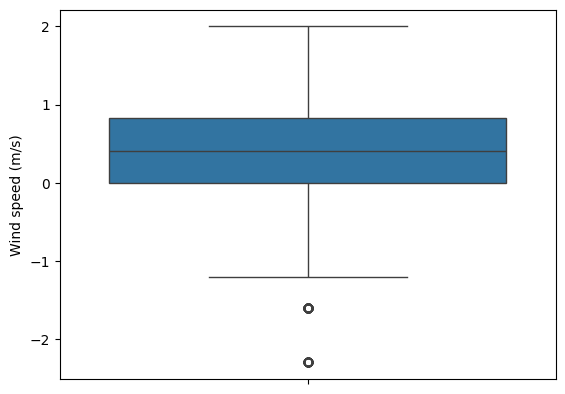

In [29]:
# sns.displot(np.log(df['Wind speed (m/s)']))
df['Wind speed (m/s)'] = np.log(df['Wind speed (m/s)'])
sns.boxplot(df['Wind speed (m/s)'])

In [30]:
# Q1 = df['Wind speed (m/s)'].quantile(0.25)
# Q3 = df['Wind speed (m/s)'].quantile(0.75)
# IQR = Q3 - Q1
# LL =  Q1 - 1.5 * IQR
# UL =  Q3 + 1.5 * IQR
# df.loc[df['Wind speed (m/s)'] <= LL, 'Wind speed (m/s)'] = LL
# df.loc[df['Wind speed (m/s)'] >= UL, 'Wind speed (m/s)'] = UL
# sns.boxplot(df['Wind speed (m/s)'])


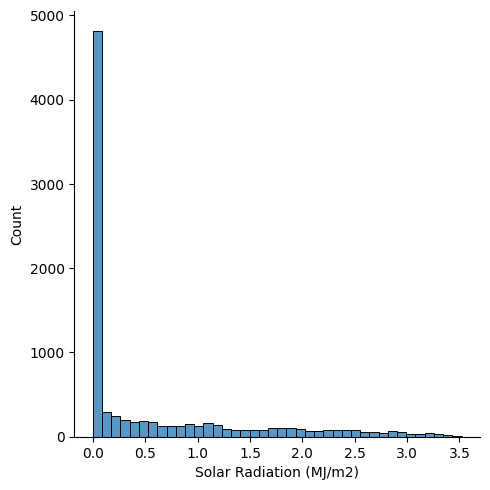

In [31]:
sns.displot(df['Solar Radiation (MJ/m2)'])

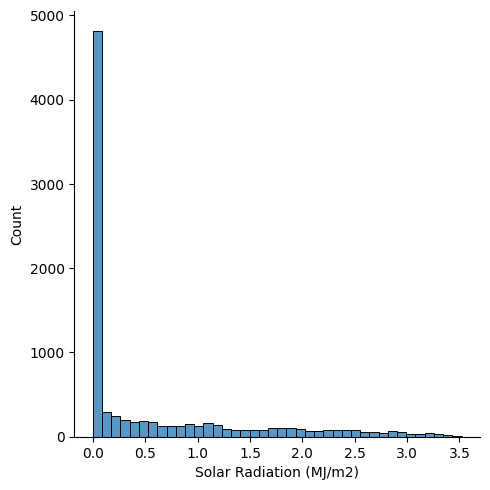

In [32]:
# df['Solar Radiation (MJ/m2)'] = np.log(df['Solar Radiation (MJ/m2)'])
sns.displot(df['Solar Radiation (MJ/m2)'])

In [33]:
# pt = PowerTransformer(method = 'yeo-johnson', standardize= True)
# # sns.displot(pt.fit_transform(df['Solar Radiation (MJ/m2)'].values.reshape(-1, 1)))
# df['Solar Radiation (MJ/m2)'] = pt.fit_transform(df['Solar Radiation (MJ/m2)'].values.reshape(-1, 1))

<Axes: ylabel='Solar Radiation (MJ/m2)'>

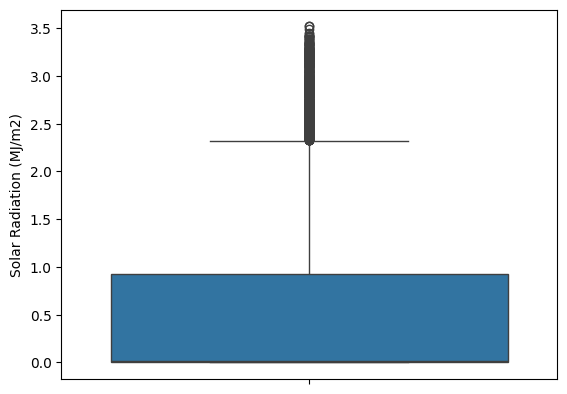

In [34]:
sns.boxplot(df['Solar Radiation (MJ/m2)'])

In [35]:
# 0, 19) : Hour
# (0, 19) : Temperature(°C)
# (0, 19) : Humidity(%)
# (161, 19) : Wind speed (m/s)
# (0, 19) : Visibility (10m)
# (0, 19) : Dew point temperature(°C)
# (641, 19) : Solar Radiation (MJ/m2)
# (528, 19) : Rainfall(mm)
# (443, 19) : Snowfall (cm)
# (744, 19) : year
# (0, 19) : month
# (0, 19) : day
# (0, 19) : is_business_day

<Axes: ylabel='Rainfall(mm)'>

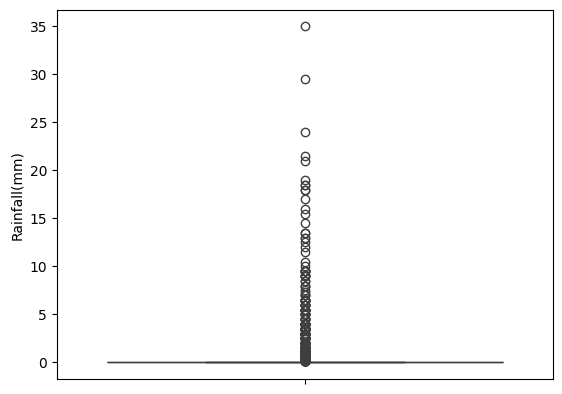

In [36]:
sns.boxplot(df['Rainfall(mm)'])

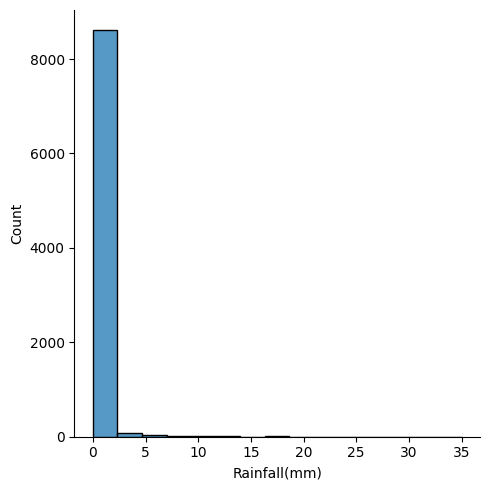

In [37]:
sns.displot(df['Rainfall(mm)'])

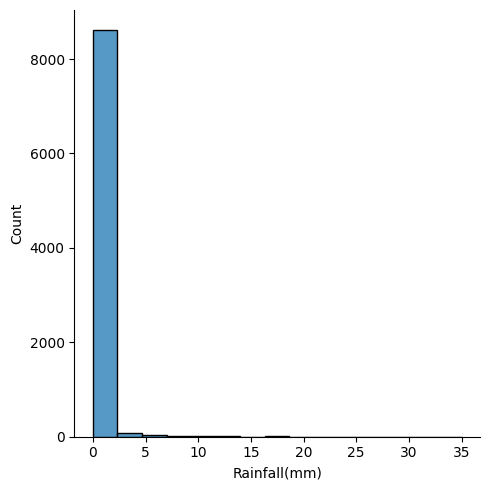

In [38]:
# df['Rainfall(mm)'] = np.log(df['Rainfall(mm)'])
sns.displot(df['Rainfall(mm)'])

<Axes: ylabel='Rainfall(mm)'>

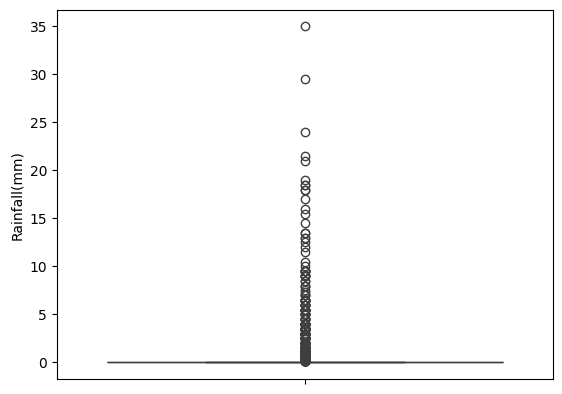

In [39]:
sns. boxplot(df['Rainfall(mm)'])

<Axes: ylabel='Snowfall (cm)'>

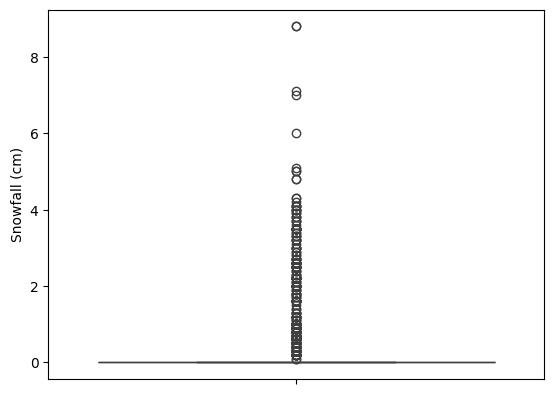

In [40]:
sns.boxplot(df['Snowfall (cm)'])

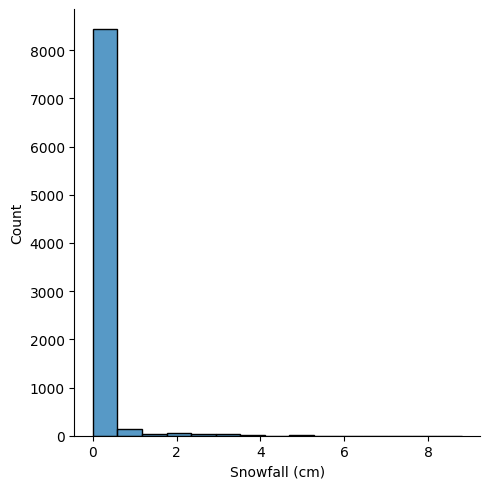

In [41]:
sns.displot(df['Snowfall (cm)'])

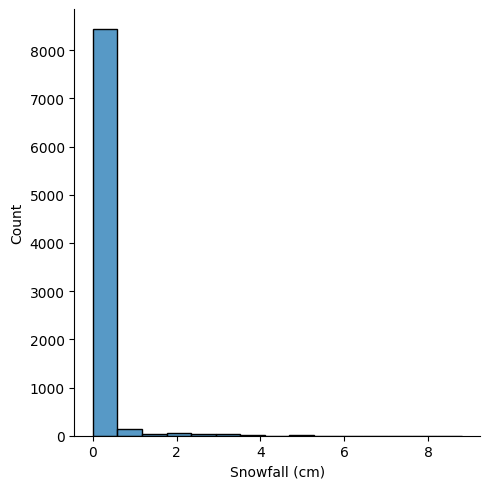

In [42]:
# df['Snowfall (cm)'] = np.log(df['Snowfall (cm)'])
sns.displot(df['Snowfall (cm)'])

<Axes: ylabel='Snowfall (cm)'>

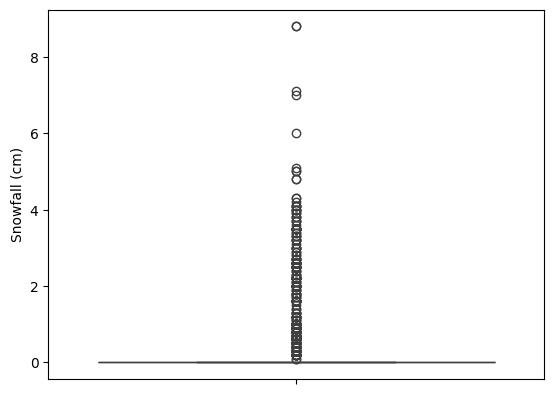

In [43]:
sns.boxplot(df['Snowfall (cm)'])

In [44]:
# 0, 19) : Hour
# (0, 19) : Temperature(°C)
# (0, 19) : Humidity(%)
# (161, 19) : Wind speed (m/s)
# (0, 19) : Visibility (10m)
# (0, 19) : Dew point temperature(°C)
# (641, 19) : Solar Radiation (MJ/m2)
# (528, 19) : Rainfall(mm)
# (443, 19) : Snowfall (cm)
# (744, 19) : year
# (0, 19) : month
# (0, 19) : day
# (0, 19) : is_business_day

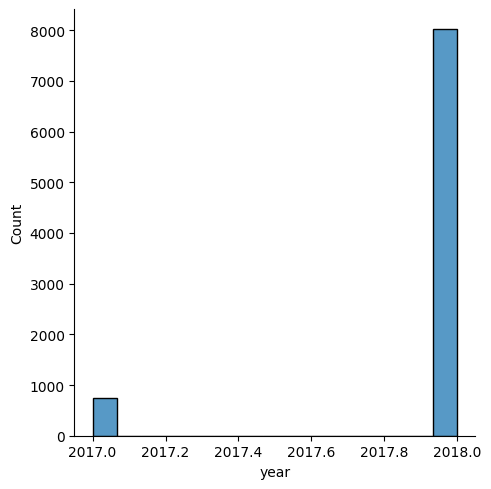

In [45]:
sns.displot(df['year'])

<Axes: ylabel='year'>

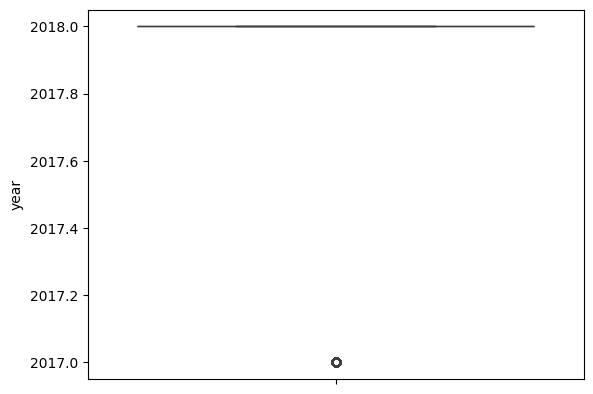

In [46]:
sns.boxplot(df['year'])

In [47]:
for column in numerical_cols:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        outlier = df[(df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR)]
        # if outlier.shape[0] > 50:
        #     df[column] = np.log(df[column])
        print(f"{outlier.shape} : {column}")

(0, 19) : Hour
(0, 19) : Temperature(°C)
(0, 19) : Humidity(%)
(209, 19) : Wind speed (m/s)
(0, 19) : Visibility (10m)
(0, 19) : Dew point temperature(°C)
(641, 19) : Solar Radiation (MJ/m2)
(528, 19) : Rainfall(mm)
(443, 19) : Snowfall (cm)
(744, 19) : year
(0, 19) : month
(0, 19) : day
(0, 19) : is_business_day


<Axes: ylabel='Wind speed (m/s)'>

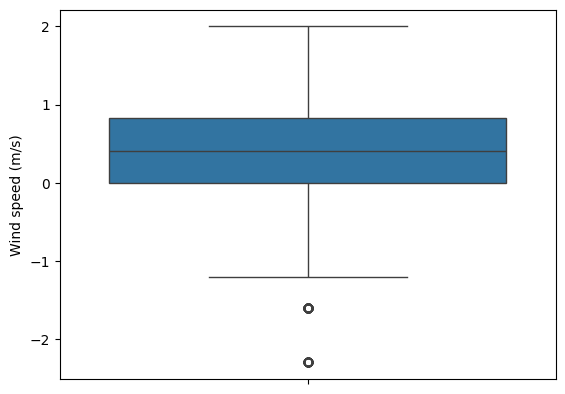

In [48]:
sns.boxplot(df['Wind speed (m/s)'])

In [49]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year,month,day,day_name,is_business_day
0,01/12/2017,254,0,-5.2,37,0.788457,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday,1
1,01/12/2017,204,1,-5.5,38,-0.223144,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday,1
2,01/12/2017,173,2,-6.0,39,0.000000,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday,1
3,01/12/2017,107,3,-6.2,40,-0.105361,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday,1
4,01/12/2017,78,4,-6.0,36,0.832909,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday,1


In [50]:
# for column in ['Solar Radiation (MJ/m2)','Rainfall(mm)', 'Snowfall (cm)']:
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1
#     outlier = df[(df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR)]
#     df = df[~outlier]
# for col in ['Solar Radiation (MJ/m2)','Rainfall(mm)', 'Snowfall (cm)']:
#     Q1 = df[col].quantile(0.25)
#     Q3 = df[col].quantile(0.75)
#     IQR = Q3 - Q1
#     LL =  Q1 - 1.5 * IQR
#     UL =  Q3 + 1.5 * IQR
#     df.loc[df[col] <= LL, col] = LL
#     df.loc[df[col] >= UL, col] = UL
# sns.boxplot(df['Wind speed (m/s)'])

<Axes: ylabel='Snowfall (cm)'>

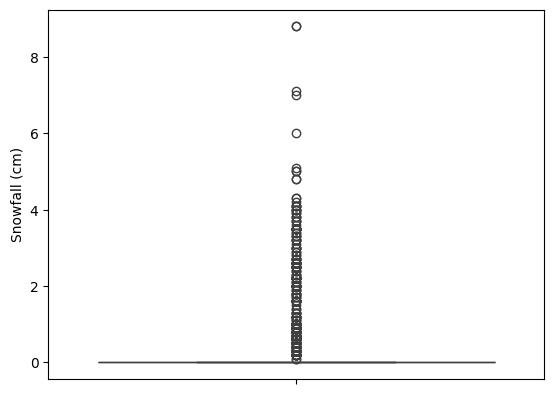

In [51]:
sns.boxplot(df['Snowfall (cm)'])

In [52]:
df['Snowfall (cm)'].value_counts()

Snowfall (cm)
0.0    8317
0.3      42
1.0      39
0.9      34
0.5      34
0.7      31
0.8      22
2.0      22
0.4      21
1.6      19
2.2      18
0.2      15
0.6      15
3.5      14
2.6      12
2.5      10
1.2       8
2.7       6
1.8       5
3.0       5
4.0       4
4.1       4
3.2       4
1.3       4
3.7       3
3.3       3
1.1       3
3.8       3
2.3       3
2.1       3
1.9       3
1.7       3
2.4       3
3.4       2
8.8       2
2.8       2
2.9       2
0.1       2
5.0       2
4.8       2
1.4       2
3.9       2
4.3       2
5.1       1
1.5       1
3.1       1
7.1       1
7.0       1
6.0       1
3.6       1
4.2       1
Name: count, dtype: int64

In [53]:
# data cleaning
def handle_categorical_types(df:pd.DataFrame)-> pd.DataFrame:
    df['Holiday'] = df['Holiday'].astype('category')
    df['Functioning Day'] = df['Functioning Day'].astype('category')
    df['Seasons'] = df['Seasons'].astype('category')
    df['day_name'] = df['day_name'].astype('category')
    return df

def handle_numeric_types(df:pd.DataFrame) -> pd.DataFrame:
    for column in df.columns:
        if pd.api.types.is_object_dtype(df[column]):
            df[column] = df[column].astype(str)
        elif pd.api.types.is_numeric_dtype(df[column]):
            df[column] = pd.to_numeric(df[column], errors='coerce')
        elif pd.api.types.is_datetime64_dtype(df[column]):
            df[column] = pd.to_datetime(df[column])
    return df

def drop_duplicates(df:pd.DataFrame)-> pd.DataFrame:
    duplicated = df[df.duplicated(keep=False)]
    if duplicated.shape[0] > 0:
        df = df.drop_duplicates(inplace= True)
    return df

def handle_missing_values(df:pd.DataFrame) -> pd.DataFrame:
    features_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]
    for feature in features_with_na:
        if df[feature].dtype == 'categorical':
            df[feature].fillna(df[feature].mode()[0], inplace=True)
        else:
            df[feature].fillna(df[feature].mean())
    return df

def get_statistical_properties(df:pd.DataFrame, column: str) -> Tuple[float, float, float]:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return Q1, Q3, IQR

def handle_exponential_distribution(df:pd.DataFrame) -> pd.DataFrame:
    numerical_cols = df.select_dtypes(include=['number']).columns.to_list()
    numerical_cols.remove('Rented Bike Count')
    for column in numerical_cols:
        if column not in ['Solar Radiation (MJ/m2)','Rainfall(mm)', 'Snowfall (cm)']:
            Q1, Q3, IQR = get_statistical_properties(df, column)
            outlier = df[(df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR)]
            if outlier.shape[0] > 50:
                df[column] = np.log(df[column])
    return df

def removing_outliers(df:pd.DataFrame) -> pd.DataFrame:
    # numerical_cols = df.select_dtypes(include=['number']).columns.to_list()
    for column in ['Solar Radiation (MJ/m2)','Rainfall(mm)', 'Snowfall (cm)']:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        outlier = df[(df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR)]
        df = df[~outlier]
    return df


In [54]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year,month,day,day_name,is_business_day
0,01/12/2017,254,0,-5.2,37,0.788457,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday,1
1,01/12/2017,204,1,-5.5,38,-0.223144,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday,1
2,01/12/2017,173,2,-6.0,39,0.000000,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday,1
3,01/12/2017,107,3,-6.2,40,-0.105361,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday,1
4,01/12/2017,78,4,-6.0,36,0.832909,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday,1


### Feature Engineering

In [55]:
from src.utils.main_utils import MixedTypeFeatureSelector

In [56]:
# feat eng -> feature extraction, feature transformation, scaling, resampling(data-imbalance),
def feature_extraction(df:pd.DataFrame)-> pd.DataFrame:
    df['year'] = pd.DatetimeIndex(df['Date']).year
    df['month'] = pd.DatetimeIndex(df['Date']).month
    df['day'] = pd.DatetimeIndex(df['Date']).day
    df['day_name'] = pd.DatetimeIndex(df['Date']).day_name()
    df['is_business_day'] = df['day_name'].apply(lambda x:1 if x not in ['Saturday','Sunday'] else 0)
    return df

def separate_dataset(df: pd.DataFrame) -> Tuple[pd.DataFrame, pd.Series]:
    X = df.drop(columns='Rented Bike Count', axis=1)
    y = df['Rented Bike Count']
    return X, y

def feature_transformation(df:pd.DataFrame)-> pd.DataFrame:
    df['Holiday'] = np.where(df['Holiday'] =='Holiday', 1, 0)
    df['Seasons'] = df['Seasons'].map({'Spring': 1, 'Summer': 2, 'Autumn': 3, 'Winter': 4})
    df['Functioning Day'] = np.where(df['Functioning Day'] =='Yes', 1, 0)
    df['day_name'] = df['day_name'].map({'Monday': 1, 'Tuesday': 2, 'Wednsday': 3, 'Thursday': 4, 'Friday': 5})
    df.drop(columns='Date', axis=1, inplace=True)
    # X, y = separate_dataset(df)
    return df

def get_skewed_features(df: pd.DataFrame) -> list:
    continuous_features = df.select_dtypes(include=['float64', 'int64']).columns.to_list()
    skewed_features = df[continuous_features].apply(lambda x: x.skew()).abs()
    transform_features = skewed_features[skewed_features> 1.0].index.to_list()
    return transform_features

# def handle_skewed_data(df:pd.DataFrame)-> Tuple[pd.DataFrame, Optional[pd.Series]]:
#     pt = PowerTransformer(method = 'yeo-johnson')
#     transform_features = get_skewed_features(df)
#     if len(transform_features) > 0:
#         X, y = separate_dataset(df)
#         transform_x = X.copy()
#         transform_x[transform_features] = pt.fit_transform(transform_x[transform_features])
#         df[transform_x] = X[transform_features]
#         return df, y
#     else:
#         return df, None
    
def remove_highly_corrected_features(df:pd.DataFrame) -> pd.DataFrame:
    corr_matrix = df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    highly_corr_features = [column for column in upper.columns if any(upper[column] > 0.95)]
    df.drop(columns=highly_corr_features, axis=1, inplace=True)
    return df

def feature_selection(df:pd.DataFrame)-> Tuple[pd.DataFrame, Optional[pd.Series]]:
    X, y = separate_dataset(df)
    selector = MixedTypeFeatureSelector(n_features=7)
    X_selected = selector.fit_transform(X, y)
    importance_df = selector.get_feature_importance()
    return X_selected, y
    

def dimension_reduction(X: np.ndarray, y: np.ndarray):
    raise NotImplementedError('Not implemented yet for dimension reduction')

def split_data(X: pd.DataFrame,
               y: pd.Series) -> Tuple[pd.DataFrame, pd.DataFrame, 
                                      pd.DataFrame, pd.Series, 
                                      pd.Series, pd.Series]:
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,
                                                                random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val,
                                                      test_size=0.25, random_state=42)
    return X_train, X_val, X_test, y_train, y_val, y_test

def feature_scaling(X_train:pd.DataFrame,
                    X_valid: pd.DataFrame)-> Tuple[Union[pd.DataFrame, np.ndarray],
                                                   Union[pd.DataFrame, np.ndarray]]:
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_valid_scaled = scaler.transform(X_valid)
    return X_train_scaled, X_valid_scaled



In [57]:
df['Holiday'] = np.where(df['Holiday'] =='Holiday', 1, 0)
df['Seasons'] = df['Seasons'].map({'Spring': 1, 'Summer': 2, 'Autumn': 3, 'Winter': 4})
df['Functioning Day'] = np.where(df['Functioning Day'] =='Yes', 1, 0)
df['day_name'] = df['day_name'].map({'Monday': 1, 'Tuesday': 2, 'Wednsday': 3, 'Thursday': 4, 'Friday': 5})
df['day_name'].fillna(df['day_name'].mode()[0], inplace=True)
    # df[feature].fillna(df[feature].mode()[0], inplace=True)
df.drop(columns='Date', axis=1, inplace=True)
# X, y = separate_dataset(df)


In [58]:
df['day_name'].isna().sum()

np.int64(0)

In [59]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year,month,day,day_name,is_business_day
0,254,0,-5.2,37,0.788457,2000,-17.6,0.0,0.0,0.0,4,0,1,2017,1,12,4.0,1
1,204,1,-5.5,38,-0.223144,2000,-17.6,0.0,0.0,0.0,4,0,1,2017,1,12,4.0,1
2,173,2,-6.0,39,0.000000,2000,-17.7,0.0,0.0,0.0,4,0,1,2017,1,12,4.0,1
3,107,3,-6.2,40,-0.105361,2000,-17.6,0.0,0.0,0.0,4,0,1,2017,1,12,4.0,1
4,78,4,-6.0,36,0.832909,2000,-18.6,0.0,0.0,0.0,4,0,1,2017,1,12,4.0,1


In [60]:
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
highly_corr_features = [column for column in upper.columns if any(upper[column] > 0.95)]
df.drop(columns=highly_corr_features, axis=1, inplace=True)
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year,month,day,day_name,is_business_day
0,254,0,-5.2,37,0.788457,2000,-17.6,0.0,0.0,0.0,4,0,1,2017,1,12,4.0,1
1,204,1,-5.5,38,-0.223144,2000,-17.6,0.0,0.0,0.0,4,0,1,2017,1,12,4.0,1
2,173,2,-6.0,39,0.000000,2000,-17.7,0.0,0.0,0.0,4,0,1,2017,1,12,4.0,1
3,107,3,-6.2,40,-0.105361,2000,-17.6,0.0,0.0,0.0,4,0,1,2017,1,12,4.0,1
4,78,4,-6.0,36,0.832909,2000,-18.6,0.0,0.0,0.0,4,0,1,2017,1,12,4.0,1


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Rented Bike Count          8760 non-null   int64   
 1   Hour                       8760 non-null   int64   
 2   Temperature(°C)            8760 non-null   float64 
 3   Humidity(%)                8760 non-null   int64   
 4   Wind speed (m/s)           8760 non-null   float64 
 5   Visibility (10m)           8760 non-null   int64   
 6   Dew point temperature(°C)  8760 non-null   float64 
 7   Solar Radiation (MJ/m2)    8760 non-null   float64 
 8   Rainfall(mm)               8760 non-null   float64 
 9   Snowfall (cm)              8760 non-null   float64 
 10  Seasons                    8760 non-null   category
 11  Holiday                    8760 non-null   int64   
 12  Functioning Day            8760 non-null   int64   
 13  year                       8760 n

In [62]:
df.sample(10)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year,month,day,day_name,is_business_day
3046,499,22,3.9,68,1.098612,737,-1.4,0.00,0.0,0.0,1,0,1,2018,6,4,1.0,1
4671,2288,15,25.5,50,0.788457,1025,14.3,0.47,0.0,0.0,2,0,1,2018,6,13,2.0,1
8290,563,10,10.2,68,-0.356675,354,4.5,1.06,0.0,0.0,3,0,1,2018,11,11,2.0,0
8693,140,5,3.0,34,0.095310,1032,-11.3,0.00,0.0,0.0,3,0,1,2018,11,28,2.0,1
4619,1107,11,23.2,52,0.336472,2000,12.7,1.53,0.0,0.0,2,0,1,2018,11,6,2.0,1
7877,193,5,7.8,85,-0.105361,1542,5.4,0.00,0.0,0.0,3,0,1,2018,10,25,4.0,1
3728,579,8,14.4,51,0.832909,1907,4.3,0.92,0.0,0.0,1,0,1,2018,5,5,2.0,0
5225,2282,17,26.6,52,0.788457,2000,15.9,1.02,0.0,0.0,2,0,1,2018,6,7,4.0,1
3026,27,2,7.3,96,0.000000,337,6.6,0.00,1.5,0.0,1,0,1,2018,6,4,1.0,1
5045,133,5,22.1,97,-0.693147,152,21.5,0.00,1.5,0.0,2,0,1,2018,6,29,5.0,1


### Feature selection

In [63]:
X, y = separate_dataset(df)
selector = MixedTypeFeatureSelector(n_features=7)
X_selected = selector.fit_transform(X, y)
importance_df = selector.get_feature_importance()
# X = X[X_selected]

In [64]:
X_selected

,Temperature(°C),Hour,Solar Radiation (MJ/m2),Seasons,Dew point temperature(°C),Functioning Day,Rainfall(mm)
0,-5.2,0,0.0,4,-17.6,1,0.0
1,-5.5,1,0.0,4,-17.6,1,0.0
2,-6.0,2,0.0,4,-17.7,1,0.0
3,-6.2,3,0.0,4,-17.6,1,0.0
4,-6.0,4,0.0,4,-18.6,1,0.0
...,...,...,...,...,...,...,...
8755,4.2,19,0.0,3,-10.3,1,0.0
8756,3.4,20,0.0,3,-9.9,1,0.0
8757,2.6,21,0.0,3,-9.9,1,0.0
8758,2.1,22,0.0,3,-9.8,1,0.0


In [65]:
importance_df

,Feature,Score,Rank
0,Temperature(°C),0.412912,1
1,Hour,0.346199,2
2,Solar Radiation (MJ/m2),0.211936,3
3,Seasons,0.210695,4
4,Dew point temperature(°C),0.208070,5
5,Functioning Day,0.182461,6
6,Rainfall(mm),0.125794,7


In [66]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X_selected, y, test_size=0.2,
                                                                random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val,
                                                      test_size=0.25, random_state=42)

In [67]:
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_valid_scaled = scaler.transform(X_val)

In [68]:
X_test

,Temperature(°C),Hour,Solar Radiation (MJ/m2),Seasons,Dew point temperature(°C),Functioning Day,Rainfall(mm)
6056,27.2,8,0.70,2,21.0,1,0.0
5556,32.6,12,3.21,2,21.1,1,0.0
5990,34.0,14,1.68,2,22.1,1,0.0
7674,16.9,18,0.11,3,5.5,1,0.0
3319,6.4,7,0.19,1,-3.0,1,0.0
...,...,...,...,...,...,...,...
8307,4.6,3,0.00,3,-1.4,1,0.0
100,-7.2,4,0.00,4,-20.4,1,0.0
6605,20.6,5,0.00,3,13.7,1,0.0
1783,-7.2,7,0.00,4,-11.7,1,0.0


In [62]:
X_train

,Temperature(°C),Hour,Solar Radiation (MJ/m2),Seasons,Dew point temperature(°C),Functioning Day,Humidity(%)
0,7.6,20,-4.605170,3,0.0,1,59
1,18.2,7,-0.579818,2,13.6,1,75
2,25.1,19,-4.605170,2,20.1,1,74
3,-3.2,23,-4.605170,4,-12.1,1,50
4,-7.5,13,0.832909,4,-22.9,1,28
...,...,...,...,...,...,...,...
5251,24.8,9,-0.462035,2,20.0,1,75
5252,25.6,23,-4.605170,2,20.8,1,75
5253,3.1,17,0.000000,4,-21.9,1,14
5254,22.0,11,-1.021651,2,21.3,1,96


In [70]:
# processes
# cleaning-> handling datatypes, data duplication, missing values,
# feat eng -> feature extraction, feature transformation, scaling, resampling(data-imbalance),

### model training and validation

In [71]:
# model training and validation

In [44]:
from abc import  ABC, abstractmethod
import os
from typing import Union
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from typing import Tuple
import numpy as np
import pandas as pd
import joblib
from src.exception import AppException
from loguru import logger
from sklearn.preprocessing import MinMaxScaler
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

class Component(ABC):
    """Abstract base class for components."""
    @abstractmethod
    def load_data(self) -> None:
        pass
    
    @abstractmethod
    def save_data(self) -> None:
        pass

def get_tree_based_models() -> list:
    """Return a list of tree-based models."""
    return [
        RandomForestRegressor(),
        GradientBoostingRegressor(),
        # CatBoostRegressor(),
        XGBRegressor(),
        LGBMRegressor()
    ]

class ModelTrainingTrees(Component):
    def __init__(self,data_source):
        self.data_source = data_source
        self.models = []
        self.accuracy_dict = {}

    def load_data(self) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
        """load data for training"""
        filepath = os.path.join(self.data_source)
        X_train = pd.read_csv(os.path.join(filepath, 'X_train.csv'))
        y_train = pd.read_csv(os.path.join(filepath, 'y_train.csv'))
        X_val = pd.read_csv(os.path.join(filepath, 'X_val'))
        y_val = pd.read_csv(os.path.join(filepath, 'y_val.csv'))
        return X_train, y_train, X_val, y_val
    
    def feature_scaling(self, X_train:pd.DataFrame,
                    X_valid: pd.DataFrame)-> Tuple[Union[pd.DataFrame, np.ndarray],
                                                   Union[pd.DataFrame, np.ndarray],
                                                   StandardScaler]:
        logger.info("feature scaling process ...")
        scaler = MinMaxScaler()
        X_train = self._clean_infinity_values(X_train)
        scaling_cols = [col for col in X_train.columns if col not in self.excluded_cols]
        X_train_scaled = scaler.fit_transform(X_train[scaling_cols])
        X_valid_scaled = scaler.transform(X_valid[scaling_cols])
        logger.debug("feature scaling process done successfully")
        return X_train_scaled, X_valid_scaled, scaler

    def train_model(self) -> None:
        """train tree based models only"""
        tree_models  = get_tree_based_models()
        for idx, model in enumerate(tree_models):
            model.fit(self.X_train, self.y_train)
            self.models.append(model)

    def validate_model(self) -> None:
        """validate tree based models only"""
        for model in self.models:
            y_pred = model.predict(self.X_valid)
            self.accuracy_dict[model.__class__.__name__] = r2_score(self.y_valid, y_pred)
            print(f"Accuracy of {model.__class__.__name__} model: {r2_score(self.y_valid, y_pred)}")

    def select_best_model(self):
        """select best tree based model only"""
        best_model = max(zip(self.accuracy_dict.values(), self.accuracy_dict.keys()))[1]
        return best_model
    
    def save_data(self, model) -> None:
        """save best tree based model only"""
        filepath = os.path.join(self.data_source)
        os.makedirs(filepath, exist_ok=True)
        try:
            joblib.dump(model, os.path.join(filepath, "best_model.joblib"))
        except Exception as e:
            raise AppException("Failed to save model", e)
    
    def save_artifact(self, scaler: StandardScaler)-> None:
        logger.info("saving artifacts...")
        filepath = os.path.join(self.artifact_store.artifacts_path)
        os.makedirs(filepath, exist_ok=True)
        try:
            joblib.dump(scaler, os.path.join(filepath, "scaler.joblib"))
            logger.debug("saving artifacts done successfully")
        except Exception as e:
            logger.error("Error saving artifacts to %s", filepath)
            raise AppException(f"Failed to save artifacts to {filepath}.", e)
        
# class ModelTrainingEnsemble(Train):
#     """Abstract base class for ensemble training components."""
#     def __init__(self, X_train, y_train, X_val, y_val) -> None:
#         super().__init__()
#         self.X_train = X_train
#         self.y_train = y_train
#         self.X_valid = X_val
#         self.y_valid = y_val
#         self.accuracy_dict = {}

#     def train_model(self):
#         """train ensemble based models only"""
#         ensemble_models = get_ensemble_based_models()
#         for idx, model in enumerate(ensemble_models):
#             model.fit(X_train, y_train)


In [45]:
import os
import pandas as pd
import numpy as np
path = '/Users/thobelasixpence/Documents/ml_zoomcamp_project/ml-mid-term-project/data/feature_store/'
# filepath = os.path.join('/data/feature_store')

X_train = pd.read_csv(os.path.join(path, 'X_train.csv'))
y_train = pd.read_csv(os.path.join(path, 'y_train.csv'))
X_val = pd.read_csv(os.path.join(path, '_X_val.csv'))
y_val = pd.read_csv(os.path.join(path, 'y_val.csv'))

In [46]:
excluded_cols = [
            'Wind speed (m/s)', 
            'Solar Radiation (MJ/m2)',
            'Rainfall(mm)', 
            'Snowfall (cm)', 
            'year',
            'Seasons'
        ]
for col in excluded_cols:
    if col in X_train.columns:
        X_train[col] = X_train[col].replace(np.inf, X_train[col].replace([np.inf, -np.inf], np.nan).max())
        X_train[col] = X_train[col].replace(-np.inf, X_train[col].replace([np.inf, -np.inf], np.nan).min())
        X_train[col] = X_train[col].fillna(X_train[col].median())

In [47]:
scaling_cols = [col for col in X_train.columns if col not in excluded_cols]
scaling_cols

['Temperature(°C)',
 'Hour',
 'Dew point temperature(°C)',
 'Functioning Day',
 'Humidity(%)']

In [48]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[scaling_cols])
X_valid_scaled = scaler.transform(X_val[scaling_cols])

In [49]:

models = []
tree_models  = get_tree_based_models()
for idx, model in enumerate(tree_models):
    model.fit(X_train_scaled, y_train)
    models.append(model)


/Users/thobelasixpence/Documents/ml_zoomcamp_project/ml-mid-term-project/mid-term-proj/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/thobelasixpence/Documents/ml_zoomcamp_project/ml-mid-term-project/mid-term-proj/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/thobelasixpence/Documents/ml_zoomcamp_project/ml-mid-term-project/mid-term-proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example u

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000286 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 622
[LightGBM] [Info] Number of data points in the train set: 5256, number of used features: 5
[LightGBM] [Info] Start training from score 704.245053


In [50]:
X_valid_scaled

array([[0.3502627 , 0.52173913, 0.17647059, 1.        , 0.17346939],
       [0.54290718, 0.95652174, 0.67820069, 1.        , 0.75510204],
       [0.44308231, 0.47826087, 0.50865052, 1.        , 0.55102041],
       ...,
       [0.7530648 , 0.91304348, 0.85121107, 1.        , 0.68367347],
       [0.79684764, 0.26086957, 0.9567474 , 1.        , 0.85714286],
       [0.28721541, 0.        , 0.38062284, 1.        , 0.59183673]])

In [51]:
accuracy_dict = {}
for model in models:
    y_pred = model.predict(X_valid_scaled)
    accuracy_dict[model.__class__.__name__] = r2_score(y_val, y_pred)
    print(f"Accuracy of {model.__class__.__name__} model: {r2_score(y_val, y_pred)}")

Accuracy of RandomForestRegressor model: 0.8105682114031432
Accuracy of GradientBoostingRegressor model: 0.8123834820689483
Accuracy of XGBRegressor model: 0.8187183141708374
Accuracy of LGBMRegressor model: 0.8325350431979349


In [52]:
best_model = max(zip(accuracy_dict.values(), accuracy_dict.keys()))[1]
best_model

'LGBMRegressor'

In [53]:
for m in models:
    if best_model == m.__class__.__name__:
        print(m.__class__.__name__)
        wanted_model = m

LGBMRegressor


In [26]:
type(wanted_model)

catboost.core.CatBoostRegressor

In [ ]:
from sklearn.pipeline import make_pipeline
from typing import Optional, List, Literal, Dict, Union
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, StratifiedKFold, KFold, cross_val_score

hyperparameters = {
    # "max_depth": [1, 3, 6, 8, 10],
    "n_estimators": [50, 100, 150, 250, 300], 
    # "loss" : ['squared_error', 'absolute_error', 'huber', 'quantile'],
    "min_samples_split": [2, 4, 6, 8, 10],
    "min_samples_leaf": [1, 2, 3, 4, 5],
    # "max_features": ['auto', 'sqrt', 'log2']
}

class hyperparameterTuning:
    def __init__(self, hyperparameters: dict, data_source: str):
        self.hyperparameters = hyperparameters
        self.data_source = data_source
    
    def load_model(self):
        """load model from artifacts"""
        filepath = os.path.join(self.data_source)
        model_path = os.path.join(filepath,"model.joblib")
        try:
            model = joblib.load(model_path)
            return model
        except FileNotFoundError as e:
            raise AppException("Failed to load model", e)
    
    def save_model(self, best_model):
        # save the model
        filepath = os.path.join(self.data_source, 'best_model')
        os.makedirs(filepath, exist_ok= True)
        try:
            joblib.dump(best_model, filepath)
            logger.debug("Model saved successfully")
        except Exception as e:
            raise AppException("Failed to save model", e)
    
    def hyperparameter_tuning(self, X_train:pd.DataFrame, y_train:pd.DataFrame, model) -> None:
        """hyperparameter tuning"""
        grid_search_model = GridSearchCV(estimator=model,
                                                    param_grid=self.hyperparameters,
                                                    cv=2,
                                                    verbose=2, 
                                                    n_jobs=-1)
        # random_cv_model = RandomizedSearchCV(
        #                         estimator=chosen_model,
        #                         param_distributions=chosen_params,
        #                         n_iter=3,
        #                         cv=3,
        #                         verbose=2,
        #                         n_jobs=-1)
        kf = KFold(n_splits=5)
        best_model = grid_search_model.best_estimator_
        best_params = grid_search_model.best_params_
        scores = cross_val_score(best_model(**best_params), X_train, y_train, cv=kf)
     
        if scores.mean() > 0.85:
            # save the model
            self.save_model(best_model)
            
    
    
class ModelValidation:
    def __init__(self, data_source):
        self.data_source = data_source
        self.accuracy_dict = {}
        self.f1_score_dict = {}
    
    def load_data(self) -> Tuple[np.ndarray, np.ndarray]:
        """load data for training"""
        filepath = os.path.join(self.data_source)
        X_test = pd.read_csv(os.path.join(filepath, 'X_test.csv'))
        y_test = pd.read_csv(os.path.join(filepath, 'y_test.csv'))
        return X_test, y_test
    
    def load_artifact(self):
        scaler_path = os.path.join(self.data_source,"scaler.joblib")
        model_path = os.path.join(self.data_source,"model.joblib")
        try:
            scaler = joblib.load(scaler_path)
            model = joblib.load(model_path)
            pipeline = make_pipeline(scaler, model)
            return pipeline
        except FileNotFoundError as e:
            raise AppException("Failed to load artifacts", e)
    
    def validate_model(self, X_test:pd.DataFrame, y_test:pd.DataFrame) -> None:
        """validate tree based models only"""
        pipeline = self.load_artifact()
        y_pred = pipeline.predict(X_test)
        self.accuracy_dict['Test'] = r2_score(y_test, y_pred)
        self.f1_score_dict['Test'] = mean_absolute_error(y_test, y_pred)
        logger.debug(f"Accuracy of the model: {r2_score(y_test, y_pred)}")
        logger.debug(f"F1 Score of the model: {mean_absolute_error(y_test, y_pred)}")
    
    

In [ ]:
# loss : {'squared_error', 'absolute_error', 'huber', 'quantile'}, default='squared_error'
# Loss function to be optimized. 'squared_error' refers to the squared error for regression. 'absolute_error' refers to the absolute error of regression and is a robust loss function. 'huber' is a combination of the two. 'quantile' allows quantile regression (use alpha to specify the quantile).

# learning_rate : float, default=0.1
# Learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators. Values must be in the range [0.0, inf).

# n_estimators : int, default=100
# The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance. Values must be in the range [1, inf).

# subsample : float, default=1.0
# The fraction of samples to be used for fitting the individual base learners. If smaller than 1.0 this results in Stochastic Gradient Boosting. subsample interacts with the parameter n_estimators. Choosing subsample < 1.0 leads to a reduction of variance and an increase in bias. Values must be in the range (0.0, 1.0].

# criterion : {'friedman_mse', 'squared_error'}, default='friedman_mse'
# The function to measure the quality of a split. Supported criteria are "friedman_mse" for the mean squared error with improvement score by Friedman, "squared_error" for mean squared error. The default value of "friedman_mse" is generally the best as it can provide a better approximation in some cases.

# versionadded

# 0.18

# min_samples_split : int or float, default=2
# The minimum number of samples required to split an internal node:

# If int, values must be in the range [2, inf).
# If float, values must be in the range (0.0, 1.0] and min_samples_split will be ceil(min_samples_split * n_samples).
# versionchanged

# 0.18 Added float values for fractions.

# min_samples_leaf : int or float, default=1
# The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

# If int, values must be in the range [1, inf).
# If float, values must be in the range (0.0, 1.0) and min_samples_leaf will be ceil(min_samples_leaf * n_samples).
# versionchanged

# 0.18 Added float values for fractions.

# min_weight_fraction_leaf : float, default=0.0
# The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided. Values must be in the range [0.0, 0.5].

# max_depth : int or None, default=3
# Maximum depth of the individual regression estimators. The maximum depth limits the number of nodes in the tree. Tune this parameter for best performance; the best value depends on the interaction of the input variables. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. If int, values must be in the range [1, inf).

# min_impurity_decrease : float, default=0.0
# A node will be split if this split induces a decrease of the impurity greater than or equal to this value. Values must be in the range [0.0, inf).

# The weighted impurity decrease equation is the following:

#         N_t / N * (impurity - N_t_R / N_t * right_impurity
#                             - N_t_L / N_t * left_impurity)
# where N is the total number of samples, N_t is the number of samples at the current node, N_t_L is the number of samples in the left child, and N_t_R is the number of samples in the right child.

# N, N_t, N_t_R and N_t_L all refer to the weighted sum, if sample_weight is passed.

# versionadded

# 0.19

# init : estimator or 'zero', default=None
# An estimator object that is used to compute the initial predictions. init has to provide fit and predict. If 'zero', the initial raw predictions are set to zero. By default a DummyEstimator is used, predicting either the average target value (for loss='squared_error'), or a quantile for the other losses.

# random_state : int, RandomState instance or None, default=None
# Controls the random seed given to each Tree estimator at each boosting iteration. In addition, it controls the random permutation of the features at each split (see Notes for more details). It also controls the random splitting of the training data to obtain a validation set if n_iter_no_change is not None. Pass an int for reproducible output across multiple function calls. See Glossary <random_state>.

# max_features : {'sqrt', 'log2'}, int or float, default=None
# The number of features to consider when looking for the best split:

# If int, values must be in the range [1, inf).
# If float, values must be in the range (0.0, 1.0] and the features considered at each split will be max(1, int(max_features * n_features_in_)).
# If "sqrt", then max_features=sqrt(n_features).
# If "log2", then max_features=log2(n_features).
# If None, then max_features=n_features.
# Choosing max_features < n_features leads to a reduction of variance and an increase in bias.

# Note: the search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than max_features features.

# alpha : float, default=0.9
# The alpha-quantile of the huber loss function and the quantile loss function. Only if loss='huber' or loss='quantile'. Values must be in the range (0.0, 1.0).

# verbose : int, default=0
# Enable verbose output. If 1 then it prints progress and performance once in a while (the more trees the lower the frequency). If greater than 1 then it prints progress and performance for every tree. Values must be in the range [0, inf).

# max_leaf_nodes : int, default=None
# Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. Values must be in the range [2, inf). If None, then unlimited number of leaf nodes.

# warm_start : bool, default=False
# When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just erase the previous solution. See the Glossary <warm_start>.

# validation_fraction : float, default=0.1
# The proportion of training data to set aside as validation set for early stopping. Values must be in the range (0.0, 1.0). Only used if n_iter_no_change is set to an integer.

# versionadded

# 0.20

# n_iter_no_change : int, default=None
# n_iter_no_change is used to decide if early stopping will be used to terminate training when validation score is not improving. By default it is set to None to disable early stopping. If set to a number, it will set aside validation_fraction size of the training data as validation and terminate training when validation score is not improving in all of the previous n_iter_no_change numbers of iterations. Values must be in the range [1, inf). See sphx_glr_auto_examples_ensemble_plot_gradient_boosting_early_stopping.py.

# versionadded

# 0.20

# tol : float, default=1e-4
# Tolerance for the early stopping. When the loss is not improving by at least tol for n_iter_no_change iterations (if set to a number), the training stops. Values must be in the range [0.0, inf).

# versionadded

# 0.20

# ccp_alpha : non-negative float, default=0.0
# Complexity parameter used for Minimal Cost-Complexity Pruning. The subtree with the largest cost complexity that is smaller than ccp_alpha will be chosen. By default, no pruning is performed. Values must be in the range [0.0, inf). See minimal_cost_complexity_pruning for details.

In [54]:
hyperparameters = {
    # "max_depth": [1, 3, 6, 8, 10],
    "n_estimators": [50, 100, 150, 250, 300], 
    # "loss" : ['squared_error', 'absolute_error', 'huber', 'quantile'],
    "min_samples_split": [2, 4, 6, 8, 10],
    "min_samples_leaf": [1, 2, 3, 4, 5],
    # "max_features": ['auto', 'sqrt', 'log2']
}

In [55]:
# hyperparameters = {}
# grid_search_model = GridSearchCV(estimator=wanted_model,
#                                 param_grid=hyperparameters,
#                                 cv=2,
#                                 verbose=2, 
#                                 n_jobs=-1,
#                                 scoring='neg_mean_squared_error')
random_cv_model = RandomizedSearchCV(
                        estimator=wanted_model,
                        param_distributions=hyperparameters,
                        n_iter=3,
                        cv=5,
                        verbose=2,
                        n_jobs=-1)
# kf = KFold(n_splits=5)


In [56]:
random_cv_model.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


/Users/thobelasixpence/Documents/ml_zoomcamp_project/ml-mid-term-project/mid-term-proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/thobelasixpence/Documents/ml_zoomcamp_project/ml-mid-term-project/mid-term-proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/thobelasixpence/Documents/ml_zoomcamp_project/ml-mid-term-project/mid-term-proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_

[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=3. Current value: min_data_in_leaf=3
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=4. Current value: min_data_in_leaf=4
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=3. Current value: min_data_in_leaf=3
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000726 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 622
[LightGBM] [Info] Number of data points in the train set: 4204, number of used features: 5
[LightGBM] [Info] Start training from score 705.555186
[LightGBM] [Warning] Unknown parameter: m

/Users/thobelasixpence/Documents/ml_zoomcamp_project/ml-mid-term-project/mid-term-proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/thobelasixpence/Documents/ml_zoomcamp_project/ml-mid-term-project/mid-term-proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/thobelasixpence/Documents/ml_zoomcamp_project/ml-mid-term-project/mid-term-proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_

[LightGBM] [Info] Number of data points in the train set: 4204, number of used features: 5
[LightGBM] [Info] Start training from score 705.555186
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=4. Current value: min_data_in_leaf=4
[CV] END min_samples_leaf=4, min_samples_split=8, n_estimators=250; total time=   4.6s
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=4. Current value: min_data_in_leaf=4
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=4. Current value: min_data_in_leaf=4
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001793 seconds.
You can set `force_col_wise=true` to remove t

/Users/thobelasixpence/Documents/ml_zoomcamp_project/ml-mid-term-project/mid-term-proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/thobelasixpence/Documents/ml_zoomcamp_project/ml-mid-term-project/mid-term-proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/thobelasixpence/Documents/ml_zoomcamp_project/ml-mid-term-project/mid-term-proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_

[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=4. Current value: min_data_in_leaf=4
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=4. Current value: min_data_in_leaf=4
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000501 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 622
[LightGBM] [Info] Number of data points in the train set: 4205, number of used features: 5
[LightGBM] [Info] Start training from score 704.724138
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=4. Current value: min_data_in_leaf=4
[CV] END min_samples_leaf=4, min_samples_

/Users/thobelasixpence/Documents/ml_zoomcamp_project/ml-mid-term-project/mid-term-proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=5, estimator=LGBMRegressor(), n_iter=3, n_jobs=-1,
                   param_distributions={'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 4, 6, 8, 10],
                                        'n_estimators': [50, 100, 150, 250,
                                                         300]},
                   verbose=2)

In [57]:
kf = KFold(n_splits=5)
best_model = random_cv_model.best_estimator_
best_params = random_cv_model.best_params_
scores = cross_val_score(best_model, X_train_scaled, y_train, cv=kf)

/Users/thobelasixpence/Documents/ml_zoomcamp_project/ml-mid-term-project/mid-term-proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=4. Current value: min_data_in_leaf=4
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=4. Current value: min_data_in_leaf=4
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000272 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 622
[LightGBM] [Info] Number of data points in the train set: 4204, number of used features: 5
[LightGBM] [Info] Start training from score 705.555186
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=4. Current value: min_data_in_leaf=4
[LightGBM] [Warning] Unknown parameter: m

/Users/thobelasixpence/Documents/ml_zoomcamp_project/ml-mid-term-project/mid-term-proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=4. Current value: min_data_in_leaf=4
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=4. Current value: min_data_in_leaf=4
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=4. Current value: min_data_in_leaf=4
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000216 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 621
[LightGBM] [Info] Number of data points in the train set: 4205, number of used features: 5
[LightGBM] [Info] Start training from score 709.931034


/Users/thobelasixpence/Documents/ml_zoomcamp_project/ml-mid-term-project/mid-term-proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=4. Current value: min_data_in_leaf=4
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=4. Current value: min_data_in_leaf=4
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=4. Current value: min_data_in_leaf=4
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000191 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 622
[LightGBM] [Info] Number of data points in the train set: 4205, number of used features: 5
[LightGBM] [Info] Start training

/Users/thobelasixpence/Documents/ml_zoomcamp_project/ml-mid-term-project/mid-term-proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=4. Current value: min_data_in_leaf=4
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=4. Current value: min_data_in_leaf=4
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=4. Current value: min_data_in_leaf=4
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000261 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 621
[LightGBM] [Info] Number of data points in the train set: 4205, number of used features: 5
[LightGBM] [Info] Start training from score 703.165517


/Users/thobelasixpence/Documents/ml_zoomcamp_project/ml-mid-term-project/mid-term-proj/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=4. Current value: min_data_in_leaf=4


In [58]:
scores.mean()

0.8217832943740294

In [59]:
random_cv_model.best_estimator_

LGBMRegressor(min_samples_leaf=4, min_samples_split=8, n_estimators=250)

In [60]:
random_cv_model.best_params_

{'n_estimators': 250, 'min_samples_split': 8, 'min_samples_leaf': 4}

In [61]:
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(StandardScaler(), best_model)
pipeline

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lgbmregressor',
                 LGBMRegressor(min_samples_leaf=4, min_samples_split=8,
                               n_estimators=250))])

In [64]:
X_val

,Temperature(°C),Hour,Solar Radiation (MJ/m2),Seasons,Dew point temperature(°C),Functioning Day,Humidity(%)
0,2.2,12,0.688135,4,-20.4,1,17
1,13.2,22,-inf,3,8.6,1,74
2,7.5,11,0.912283,1,-1.2,1,54
3,21.7,10,-1.237874,2,21.1,1,97
4,19.0,5,-inf,2,16.4,1,85
...,...,...,...,...,...,...,...
1747,-1.1,21,-inf,4,-15.7,1,32
1748,3.8,17,-inf,4,2.3,1,90
1749,25.2,21,-inf,2,18.6,1,67
1750,27.7,6,-inf,2,24.7,1,84


In [73]:
model = joblib.load('/Users/thobelasixpence/Documents/ml_zoomcamp_project/ml-mid-term-project/artifacts/staged_model/model_pipeline.joblib')

In [74]:
model

Pipeline(steps=[('lgbmregressor',
                 LGBMRegressor(min_samples_leaf=1, min_samples_split=4,
                               n_estimators=50))])

In [75]:
y_pred = model.predict(np.array([[22, 4, 0.987, 4, 17, 1, 76]]))

[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=1. Current value: min_data_in_leaf=1


In [76]:
y_pred

array([1521.98055583])

In [77]:
y_val

,Rented Bike Count
0,351
1,1003
2,644
3,104
4,238
...,...
1747,134
1748,8
1749,2063
1750,619


In [72]:
model_2 = XGBRegressor()
model_2.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)